<center><img src="http://what-when-how.com/wp-content/uploads/2012/07/tmp26dc139_thumb.png" width=50% > </center>

# <center> Assignment 2: Neighborhood Processing & Filters </center>
<center> Computer Vision 1 University of Amsterdam </center>
    <center> Due 23:59PM, September 23, 2023 (Amsterdam time) </center>

  ***
<center>
<b>TA's: Jiayi Shen, Valentinos Pariza</b>

Student1 ID: 15128350
Student1 Name: Anesa Ibrahimi

Student2 ID: \
Student2 Name:

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )


# General Guidelines

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=CV1_environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# O. Environment Setup

In [1]:
import math
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import os

import cv2
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.signal

In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.2", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
assert sklearn.__version__ == "0.23.0", "You're not using the provided Python environment!"
# Proceed to the next cell only if you don't get any error.

# 1 Introduction


In this assignment, you will get familiar with fundamentals of neighborhood processing for image processing. These techniques allow for low-level image understanding via extraction of structural patterns such as edges and blobs. Similarly, they find an extensive use in image denoising and higher level image reasoning such as shape recognition. Moreover, neighborhood or block processing is one of the key components of *Convolutional Neural Networks*. Therefore, a good understanding of these
procedures will be a stepping stone towards understanding more complex machinery used in computer vision and machine learning.

In subsequent sections of this assignment, we will first explain neighborhood processing and introduce low-level filters commonly used to analyze images. After that, we will see how these mathematical concepts relate to practice by working through fundamental tasks such as denoising and segmentation. By the end of this assignment, you will have an overall understanding of the following:
* Gaussian and Gabor filters
* Edge detection and image denoising
* Texture-based image segmentation



# 2 Neighborhood Processing *(4 pts)*


Neighborhood processing is simply about looking around a point $I(x, y)$ (i.e. pixel) in the image, $I$, and applying a function, $h(k, l)$, which measures certain properties or relationships between the pixels in that localized window. The function, $h(k, l)$, is generally referred to as the neighborhood operator or local operator. One of the most common forms of a neighborhood operator is a linear filter. Linear filters simply compute the weighted sum of neighboring pixel intensities and assign it to the pixel of interest (output $I_{out}(i, j)$). The filters in which we are interested here are usually represented as a square matrix.

---
**Hint**: Filters, kernels, weight matrices or masks are interchangeably used in the literature. A kernel is a matrix with which we describe a neighborhood operation. This operation can, for example, be edge detection or smoothing.

---

Linear filters are shifted over the entire image plane via operators such as correlation ($\otimes$) and convolution ($\ast$). Both of these operators are *linear shift-invariant* (LSI) implying that the filters behave the same way over the entire image. Discrete forms of these operators are given in the following:


Correlation (1):
<center>
$\mathbf{I}_{out} = I \otimes  \mathbf{h}\\
 \mathbf{I}_{out}(i,j) = \sum_{k,l}  \mathbf{I}(i+k,j+l) \mathbf{h}(k,l)$
</center>
Convolution (2):
<center>
$    \mathbf{I}_{out} = \mathbf{I} \ast  \mathbf{h}\\
 \mathbf{I}_{out}(i,j) = \sum_{k,l} \mathbf{I}(i-k,j-l) \mathbf{h}(k,l)$
 </center>


---
The following example illustrates the overall idea of neighborhood processing. The kernel or the mask convolves over the input image. In the case of linear filters, this is simply multiplying each pixel intensity with the corresponding weight in the kernel (see the yellowish $7x7$ window where the kernel is placed). In the example, the kernel is $7x7$ averaging mask. You can see its effect by comparing the red (before filtering) and the green (after filtering) frames.





**Example:**
<div>
<img src="https://drive.google.com/uc?export=view&id=1HXt-WTi2Mg-jHYU4tvcKl4R29gi-g1QY" width="600"/>
</div>

### 2.1  Convolution and correlation operators (2 pts)
#### <span style="color:orange;"> Question 1 (2pts)  </span>

What is the difference between correlation and convolution operators? How do they treat the signals $\mathbf{I}$ and $\mathbf{h}$?

*The difference between these two operators can be seen in regards to how they treat filters.More specifically, correlation preserves the filter/kernel while the cnvolution operators flips the filter and is used backwards. Correlation treats signals I and h as they are and applies the filter  directly to them, while convolutio operators flips the filter prior to applying it to the signals.*

### 2.2 Convolution and correlation operators (2 pts)
#### <span style="color:orange;"> Question 2 (2pts)  </span>
Correlation and convolution operators are equivalent when we make an assumption on the form of the mask $\mathbf{h}$. Can you identify the case? Give precise answer here.

*Both Correlation and convolution are used to compute the response of mask (e.g. h) on an image. Their equivalence is apparent when the mask 'h' is symmetric, implying that the values of the filter are equal no matter from which side we read them. Therefore, if the mask 'h' is symmetric then each of their signals (I and h) are equivalent, yielding the same outcome.*

# 3 Low-level filters *(25 pts)*


In this section, you will design common linear filters used in neighborhood processing. We will focus in particular on Gaussian and Gabor filters.

## 3.1 Gaussian Filters *(10 pts)*

### 3.1.1. 1D Gaussian Filter



The 1D  Gaussian filter is defined as follows:
<center>
$ G_{\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{ exp}(-\frac{x^2}{2\sigma^2}),$
</center>
where $\sigma$ is the variance of the Gaussian. However, such formulation creates an infinitely large convolution kernel. In practice, the kernel is truncated with a `kernel_size` parameter such that $-\left\lfloor \frac{kernel\_size}{2}\right\rfloor \leq x \leq \left\lfloor \frac{kernel\_size}{2} \right\rfloor$, where $\left\lfloor . \right\rfloor$ is the floor operator. As an example, if `kernel_size` equals 3, $x \in \{ -1, 0, 1 \} $.

Now, implement the following *gauss1D* function.

**Hint:**
Do not forget to normalize your filter.

**Note:** You are not allowed to use a Python built-in function provided by *SciPy* or other libraries to compute the kernel.

In [3]:
def gauss1D(sigma, kernel_size):
    '''
    Generates the 1D Gaussian kernel with given sigma and kernel size.
    :param sigma: variance of the Gaussian function
    :param kernel_size: size of the kernel
    :return: 1D Gaussian kernel
    '''
    G = np.zeros((1, kernel_size))
    if kernel_size % 2 == 0:
        raise ValueError('kernel_size must be odd, otherwise the filter will not have a center to convolve on')

    # TODO: YOUR CODE HERE
    center_pos = kernel_size // 2
    
    for x in range(kernel_size):
        distance = x - center_pos
    
        G[0,x] = 1.0 / (np.sqrt(2.0 * np.pi) * sigma) * np.exp(-np.power((distance) / sigma, 2.0) / 2)
    
    # Flattening G into a 1D array
    G = G.flatten()

    #Normalizing filter
    G = G / np.sum(G)
    
    return G

G = gauss1D(2, 5)
print(G)

[0.15246914 0.2218413  0.25137912 0.2218413  0.15246914]


In [4]:
# Run this to test your function:
assert np.all(np.round(gauss1D(2,5), 4) == [0.1525, 0.2218, 0.2514, 0.2218, 0.1525]) # check if values are close enough if assert gives error

### 3.1.2. 2D Gaussian Filter



One of the most important properties of 2D Gaussian kernels is separability. Therefore, convolving an image with a 2D Gaussian is equivalent to convolving
the image twice with a 1D Gaussian filter, once along the x-axis and once along the y-axis **separately**. A 2D Gaussian kernel can then be defined as a product of two 1D Gaussian kernels:
<center>
$
G_{\sigma}(x, y) = G_{\sigma}(x) \times G_{\sigma}(y)\;\;$ (Eq. A)
</center>
<center>
$
 = \frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})\;\;
 $ (Eq. B)
 </center>

#### <span style="color:#F64E25;">  Exercise 1 (3pt) </span>

Implement `gauss2D` function that corresponds to *Eq. A* (not *Eq. B*) and you should make use of `gauss1D`.

**Note:** Again, you are not allowed to use a Python built-in function provided by *SciPy* or other libraries to compute the kernel.

In [5]:
def gauss2D(sigma_x, sigma_y, kernel_size):
    '''
    Generates the 2D Gaussian kernel with given sigma_x for X dimension and sigma_y for Y dimension and kernel size.
    :param sigma_x: variance of the Gaussian function for dimension X
    :param sigma_y: variance of the Gaussian function for dimension Y
    :param kernel_size: size of the kernel
    :return: 2D Gaussian kernel
    '''

    # TODO: YOUR CODE HERE
    g_x = gauss1D(sigma_x,kernel_size)
    g_y = gauss1D(sigma_y,kernel_size)

    G =  np.outer(g_x, g_y)
    return G

print(gauss2D(2, 2, 3))

[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]


In [6]:
# Run this to test your function:
assert np.all( np.round(gauss2D(2, 2, 3) , 4) == [[0.1019, 0.1154, 0.1019],
       [0.1154, 0.1308, 0.1154],
       [0.1019, 0.1154, 0.1019]])

Now consider the following two scenarios.
1. In first the image is convolved with a 2D Gaussian kernel.
2. In second image is convolved a 1D Gaussian kernel in the x- and y-direction.


#### <span style="color:orange;">  Question 3 (1 pt) </span>
Will the result be the same in (1) and (2)? Answer Yes/No. Why?

*The result will not be the same. In the first scenario ,the convolution with 2D gaussian kernel will simultaneously be performed in both x and y direction , consequently, causing the image to be smoothed in both horizontal/vertical direction. In the second scenario, the convultion is performed seperately, for each of the sperate directions causing the convultion to be performed twice.Therefore, the smoothing effect/result is not similar.*

#### <span style="color:orange;"> Question 4 (2pts)  </span>
What is the computational complexity for both cases? Give an answer in big *O* notation, *n* for width of image, *m* for height of image and *k* for size of kernel.

*The complexity of 2D gaussian kernel is O(nmk^2) while the 1D gaussian kernel has a complexity of O(nmk). The computational complexity for a 2D gaussian is higher, due to to the necessary 2D convolution process needed to be performed per pixel per image.The 1D gaussian kernel on the other performs the convultions sperately per direction which impacts/causes a small computational complexity, hence showing its efficiency.*

### 3.1.3. Gaussian Derivatives
So far the Gaussian kernels that we computed are mainly targeted to image enhancement algorithms (e.g. denoising an image). These kernels can also be used for detecting changes in the image intensity pixels. These low-level features can then further be used as building blocks for more complicated tasks like object detection or segmentation.


Concretely, the  first order derivative of the 1D Gaussian kernel is given by:

<center>
$
\frac{d}{dx}G_\sigma(x)  =\frac{d}{dx}\left( \frac{1}{\sigma\sqrt{2\pi}}\exp(-\frac{x^2}{2\sigma^2}) \right )
$
</center>

<center>
$
 = -\frac{x}{\sigma^3\sqrt{2\pi}}\exp(-\frac{x^2}{2\sigma^2}) \;\;
$ (Eq. C)
</center>

<center>
$
= -\frac{x}{\sigma^2}G_\sigma(x)
$
</center>
Similarly, the first order derivative of the 2D Gaussian kernel can be obtained by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$.

#### <span style="color:orange;"> Question 5 (1pt) </span>
Determine the first order derivative of the 2D Gaussian kernel by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$. Show your calculations, as done above for $\frac{d}{dx}G_\sigma(x)$. Remember that:

<center>
$
G_{\sigma}(x, y) =\frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})
 $
 </center>

*$\frac{d}{dx}G_\sigma(x,y)$ = $\frac{d}{dx}(\frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}))$*

$ = \frac{1}{\sigma^2 2\pi} (\frac{d}{dx} \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})) $

$ =  \frac{1}{\sigma^2 2\pi} ( -\frac{1}{2\sigma^2} \frac{d}{dx} (x^2 + y^2) ) $

$ = \frac{1}{\sigma^2 2\pi} ( -\frac{1}{2\sigma^2} (2x)) \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}) $

$ = - \frac{x}{\sigma^4 2\pi} \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}) $

------------------------
*$\frac{d}{dy}G_\sigma(x,y)$ = $\frac{d}{dy}(\frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}))$*

$ = \frac{1}{\sigma^2 2\pi} (\frac{d}{dy} \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})) $

$ =  \frac{1}{\sigma^2 2\pi} ( -\frac{1}{2\sigma^2} \frac{d}{dy} (x^2 + y^2) ) $

$ = \frac{1}{\sigma^2 2\pi} ( -\frac{y}{2\sigma^2}) \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}) $

$ = - \frac{y}{\sigma^4 2\pi} \text{ exp}(-\frac{x^2 + y^2}{2\sigma^2}) $

#### <span style="color:orange;"> Question 6 (3pts) </span>
A second order derivative of the Gaussian kernel can also be computed.
Why is it interesting to design a second order kernel? Give one example of where it is more beneficial to use them than first order derivative Gaussian kernel and explain how they can be used.

*Second order derivative of gaussian kernels are interesting to design them for their efficiency in edge detection and feature extraction tasks that require to enhance/highlight edges in image or capture specific features that can later be used to emphasize and recognize interesting patterns and insights when analyzing images. As discussed in lecture 5 , second order derivatives were more beneficial in tasks that required detecting small details/structures which were less prone to false detections or low accuracy.*

## 3.2 Gabor filters *(15 pts)*


Gabor filters fall into the category of linear filters and are widely used for *texture analysis*. The reason why they are a good choice for texture analysis is that they localize well in the frequency spectrum (*optimally* bandlimited) and therefore work as flexible *band-pass* filters.

In the following image you can see even (cosine-modulated) and odd parts (sine-modulated) of Gabor filters with fixed-σ Gaussian. You can observe time-domain filters for the modulating sinusoidals of central frequencies, 10, 20, 30, 40 and 50 Hz, respectively.


<div>
<img src="https://drive.google.com/uc?export=view&id=1wv6ZUOfiHMDgg0jW7n5lqkaFiFztjnEo" width="700"/>
</div>

Gabor filters with varying center frequencies are sensitive to different
frequency bands. Notice that the neighboring (in the frequency spectrum) filters minimally interfere with each other.


<div>
<img src="https://drive.google.com/uc?export=view&id=1hUQaKE_TwC-9_jMIao1CCxyjembMrUab" width="700"/>
</div>

### 3.2.1. 1D Gabor Filters

For the sake of simplicity, we start by studying what a Gabor function is using 1D signals (e.g. speech). The idea will later be generalized to the 2D case, which is suited for our primary interest, images. A Gabor function is a Gaussian function modulated with a complex sinusoidal carrier signal. Let us denote the Gaussian with $x(t)$ and complex sinusoidal with $m(t)$. Then, a Gabor function $g(t)$ can be formulated by:

$
g(t) = x(t) m(t)   
$ *(Eq. D)*

where $x(t) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}}$ and $m(t)=e^{j 2 \pi f_c t} = e^{j w_c t}$. $\sigma$ is the parameter determining the spread of the Gaussian and $w_c$ is the central frequency of the carrier signal.


---


**Hint:**
A complex sinusoidal can be represented as follows using the *Euler's formula*:
$e^{jwt} = \cos(wt) + j\sin(wt)$


---



Using Euler's formula, we get the following:
\begin{align}
    g(t) &= x(t)m(t) \\
    g(t) &= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}} e^{j w_c t} \\
    g(t) &= \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{t^2}{2\sigma^2}} [\cos(w_c t) + j\sin(w_c t)]
\end{align}
We can further arrange the terms and arrive at the following form
\begin{align}
    g(t) = g_e(t) + jg_o(t)
\end{align}
where $g_e(t)$ and $g_o(t)$ are the even and odd parts arranged orthogonally on the complex plane $\mathbf{Z}^2$. In practice, one can use either the even or the odd part for filtering purposes (or one can use the complex form).  

### 3.2.2. 2D Gabor Filters


The Gabor filters can also be defined in 2D as well. The main difference lies in the dimensionality of the signals (i.e. carrier and gaussian). A sine wave in 2D is described by two orthogonal spatial frequencies $u_0$ and $v_0$ such that it is given as $s(x,y) = sin(2\pi(u_0 x + v_0 y))$ where a 2D gaussian is simply $C e^{-(\frac{(x-x_0)^2}{2\sigma_x^2}) + \frac{(y-y_0)^2}{2\sigma_y^2})}$ with $C$ being a normalizing constant. 2D Gabor function then takes the following forms in the real and complex parts:

\begin{align}
    g_{real}(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right)
\cos\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right),                                              
\end{align}
\begin{align}
g_{im}(x,y; \lambda, \theta, \psi, \sigma, \gamma) &= \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right)
\sin\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right),
\end{align}

where
\begin{align}
    x^\prime &= x\cos\theta + y\sin\theta, \\
    y^\prime &= -x\sin\theta + y\cos\theta.
\end{align}

$\lambda, \theta, \psi, \sigma, \gamma$ are parameters to control the shape and size of the Gabor functionin. We set their values to create different Gabor kernels.

#### <span style="color:#F64E25;"> Exercise 2 (10pts) </span>

##### Design array of Gabor Filters

In section 4 of this notebook, you will create a Gabor Filterbank. A filterbank is a collection of filters with varying properties (e.g. {shape, texture}). A Gabor filterbank consists of Gabor filters of distinct orientations and scales. We will use this bank to extract texture information from the input image.

Now, your task is to implement function `createGabor()` but to do that you will need some helper functions, which are defined below. Finish the implementation of those and then use them in `createGabor()`.





In [7]:
def generateRotationMatrix(theta):
    '''
    Returns the rotation matrix for a given theta.
    Hint: https://en.wikipedia.org/wiki/Rotation_matrix
    :param theta: rotation parameter in radians
    :return: rotation matrix
    '''

    # TODO: YOUR CODE HERE
    # Code the rotation matrix which fits gabor equation given theta.
    cosine_val = np.cos(theta)
    sine_val = np.sin(theta)

    # Rotation Matirx general form:
    # [cos theta -sin theta
    #  sin theta  cos theta]
    
    rotMat = np.array(((cosine_val,-sine_val),(sine_val,cosine_val)))

    return rotMat


In [8]:
def createCos(rot_x, lamda, psi):
    '''
    Returns the 2D cosine carrier.
    '''

    # TODO: YOUR CODE HERE
    # Implement the cosine given rot_x, lamda and psi.
    
    #cosine carrier formula is given by eq. g_real attached above:
    # cos(2pi * (rotated_x)/lamda + psi)

    cosCarrier = np.cos(2* np.pi * (rot_x/lamda) + psi)
    return cosCarrier

In [9]:
def createSin(rot_x, lamda, psi):
    '''
    Returns the 2D sine carrier.
    '''

    # TODO: YOUR CODE HERE
    # Implement the sine given rot_x, lamda and psi.

    # sine carrier formula is given by eq. g_im attached above:
    # sin(2pi * (rotated_x)/lamda + psi)

    sinCarrier = np.sin(2* np.pi * (rot_x/lamda) + psi)

    return sinCarrier

In [11]:
def createGauss(rot_x, rot_y, gamma, sigma):
    '''
    Returns the 2D Gaussian Envelope.
    Hint: ensure that gaussEnv has same dimensions as sinCarrier and cosCarrier by reshaping it in same manner
    '''

    # TODO: YOUR CODE HERE
    # Implement the Gaussian envelope.

    gaussEnv = np.exp(-(rot_x**2 + (gamma**2)*(rot_y**2))/(2*(sigma**2)))

    return gaussEnv

Implement the function `createGabor` using above helper functions and equations for $g_{real} $ and $g_{im}$.


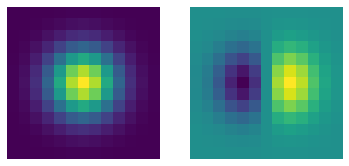

In [13]:
def createGabor(sigma, theta, lamda, psi, gamma):
    '''
    Creates a complex valued Gabor filter. Use it like this:
    myGabor = createGabor(sigma, theta, lamda, psi, gamma) generates Gabor kernels.

    :param sigma: Standard deviation of Gaussian envelope.
    :param theta: Orientation of the Gaussian envelope. Takes arguments in the range [0, pi/2).
    :param lamda: The wavelength for the carriers. The central frequency (w_c) of the carrier signals.
    :param psi: Phase offset for the carrier signal, sin(w_c . t + psi).
    :param gamma: Controls the aspect ratio of the Gaussian envelope
    :return: myGabor - A matrix of size [h,w,2], holding the real and imaginary
                        parts of the Gabor in myGabor(:,:,1) and myGabor(:,:,2), respectively.
    '''

    # Set the aspect ratio.
    sigma_x = sigma
    sigma_y = float(sigma)/gamma

    # Generate a grid
    nstds = 3
    xmax = max(abs(nstds*sigma_x*np.cos(theta)),abs(nstds*sigma_y*np.sin(theta)))
    xmax = np.ceil(max(1,xmax))
    ymax = max(abs(nstds*sigma_x*np.sin(theta)),abs(nstds*sigma_y*np.cos(theta)))
    ymax = np.ceil(max(1,ymax))

    # Make sure that we get square filters.
    xmax = max(xmax,ymax)
    ymax = max(xmax,ymax)
    xmin = -xmax
    ymin = -ymax

    # Generate a coordinate system in the range [xmin,xmax] and [ymin, ymax].
    [x,y] = np.meshgrid(np.arange(xmin, xmax+1), np.arange(ymin, ymax+1))

    # Convert to a 2-by-N matrix where N is the number of pixels in the kernel.
    XY = np.concatenate((x.reshape(1, -1), y.reshape(1, -1)), axis=0)

    # Compute the rotation of pixels by theta.
    # Hint: Create appropriate rotation matrix to compute the rotated pixel coordinates: rot(theta) * XY.
    rotMat = generateRotationMatrix(theta)
    rot_XY = np.matmul(rotMat, XY)
    rot_x = rot_XY[0,:]
    rot_y = rot_XY[1,:]


    # Create the Gaussian envelope.
    # IMPLEMENT the helper function createGauss above.
    gaussianEnv = createGauss(rot_x, rot_y, gamma, sigma)

    # Create the orthogonal carrier signals.
    # IMPLEMENT the helper functions createCos and createSin above.
    cosCarrier = createCos(rot_x, lamda, psi)
    sinCarrier = createSin(rot_x, lamda, psi)

    # Modulate (multiply) Gaussian envelope with the carriers to compute
    # the real and imaginary components of the complex Gabor filter.
    myGabor_real = gaussianEnv * cosCarrier  # TODO: modulate gaussianEnv with cosCarrier
    myGabor_imaginary = gaussianEnv * sinCarrier  # TODO: modulate gaussianEnv with sinCarrier

    myGabor_real = myGabor_real.reshape(x.shape) #Re-shaping
    myGabor_imaginary = myGabor_imaginary.reshape(x.shape)

    # Pack myGabor_real and myGabor_imaginary into myGabor.
    h, w = myGabor_real.shape
    myGabor = np.zeros((h, w, 2))
    myGabor[:,:,0] = myGabor_real
    myGabor[:,:,1] = myGabor_imaginary

    # Uncomment below to see how are the gabor filters
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(myGabor_real)    # Real
    ax.axis("off")
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(myGabor_imaginary)    # Real
    ax.axis("off")

    return myGabor

sigma = 2
theta = 0
lamda = 1000
psi = 0
gamma = 1
myGabor = createGabor(sigma, theta, lamda, psi, gamma)

Visualize how the parameters $\theta$, $\sigma$ and $\gamma$ affect the filter in spatial domain. In this task you should also make sure that it is clear to the reader of what each image represents, so making an actual visualisation is the task of this exercise.

**Hints**:
1. The initialization of these parameter are provided: $\lambda=30, \theta=0, \psi=0, \sigma=10, \gamma=0.25$.
2. Set $\theta$ as $ 0, \pi/4,$ or $\pi/2$, and keep other parameters unchanged.
3. Set $\sigma$ as $0.25, 0.50,$ or $0.75$, and keep other parameters unchanged.
4. Set $\gamma$ as $10, 30,$ or $45$, and keep other parameters unchanged.

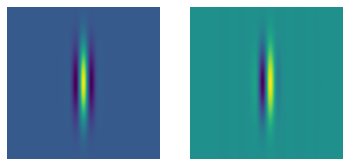

In [14]:
# HELPER FUNCTIONS (if needed)
sigma = 10
theta = 0
lamda = 30
psi = 0
gamma = 0.25

myGabor = createGabor(sigma, theta, lamda, psi, gamma)

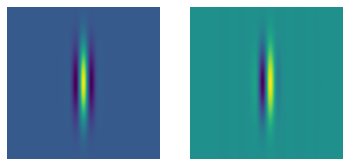

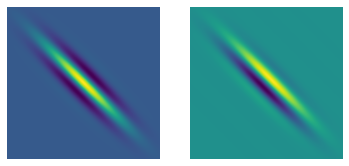

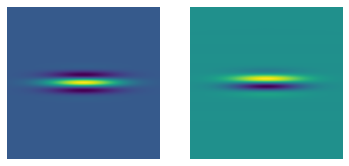

In [15]:
# YOUR CODE HERE FOR THETA
sigma = 10
theta = [0,np.pi/4,np.pi/2]
lamda = 30
psi = 0
gamma = 0.25

for x in theta:
    myGabor = createGabor(sigma, x, lamda, psi, gamma)

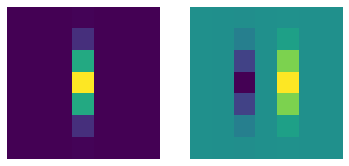

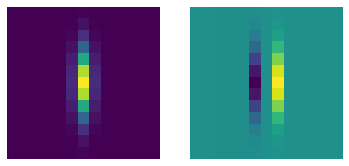

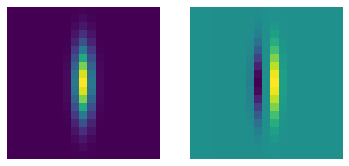

In [16]:
# YOUR CODE HERE FOR SIGMA
sigma = [0.25,0.50,0.75]
theta = 0
lamda = 30
psi = 0
gamma = 0.25

for y in sigma:
    myGabor = createGabor(y, theta, lamda, psi, gamma)

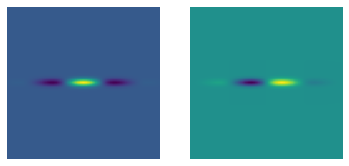

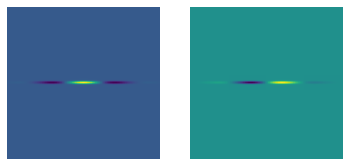

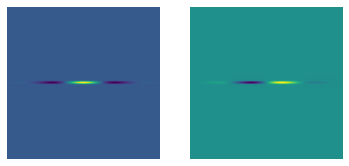

In [17]:
# YOUR CODE HERE FOR GAMMA
sigma = 10
theta = 0
lamda = 30
psi = 0
gamma = [10,30,45]

for z in gamma:
    myGabor = createGabor(sigma, theta, lamda, psi, z)

#### <span style="color:orange;"> Question 7 (5pts) </span>
Based on the visualizations of parameters and your self-study on the Gabor filters, explain shortly (1) what the parameters $\lambda, \theta, \psi, \sigma, \gamma$ control and (2) how do they influence the Gabor filter kernel visualy.

*The paramters $\lambda, \theta, \psi, \sigma, \gamma$ all account for different impacts on the Gabor filter. As can be seen from the gabor real and imaginary equation, The $\lambda$ parameter is visible in the sine and cosine wavelength.Therefore it contorols the gabor's wavelength, where smaller values are used to obtain high-frequency components while the larger values are used for low-frequency. $\theta$ value on the other hand is held accountable for the orientation of the filter, and it moves it accordingly with the specified value. When the value of theta is at higher values it moves and roatates at 45 degree angle , as can be seen from the highest theta value $\pi/4$. $\psi$ value on the other hand impacts the filter's ability to detect and respond to the different texture/phase patterns of the image. $\sigma$ value and its impact can be seen from the plots above where the larger the values of sigma, the larger the sturcutre and smoother the details of image, while the smaller values cause the it capture narrower/clearer details. Lastly the impact of $\gamma$ value is also seen above which impacts the aspect ratio. The larger values of gamma, stretch  the features , elongating along the x-axis, while the smaller values stretch it along the y-axis.*

# 4 Applications in image processing *(71 pts)*

## 4.1 Noise in digital images

The quality of digital images can be affected in different ways. For example, the
acquisition process can be very noisy and with a low-resolution (e.g. some medical
imaging modalities only generate a 128x128 image). Noise can also come from the
user who set wrong parameters on the digital camera. Consequently, different computer vision algorithms are required to enhance noisy or corrupted images. With the
growing amount of photos taken every day, image enhancement has then become a
very active area of research.

In this section, we only focus on simple algorithms to correct noise coming typically from the sensor of your camera. Many other types of noise or corruption can happen but are out of the scope of this assignment.

### 4.1.1. Salt-and-pepper noise

Noise can also occur with over-exposition causing a ”hot” pixel or with a defective
sensor causing a ”dead” pixel. This is called salt-and-pepper noise. Pixels in the
image are randomly replaced by either a white or black pixel.

### 4.1.2 Additive Gaussian noise

Noise also occurs frequently when the camera heats up. This is called thermal noise
and this can be modeled as an additive Gaussian noise. Every pixel in the image
has a noise component that corresponds to a random value chosen independently
from the same Gaussian probability distribution. The Gaussian distribution has a
mean of 0 and its standard deviation corresponds to a parameter.

\begin{equation}
\begin{array}{rl}
\mathbf{I}^{\prime}(x) = \mathbf{I}(x) + \epsilon \text{, where } \epsilon \sim  \mathcal{N}(0, \sigma^2)
\end{array}
\end{equation}

where $\mathbf{I}^{\prime}$ is the noisy image and $\mathbf{I}$ is the original image without any noise $\epsilon$.

## 4.2 Image denoising (26 pts)

### 4.2.1 Quantitative evaluation *(9 pts)*

The peak signal-to-noise ratio (PSNR) is a commonly used metric to quantitatively evaluate the performance of image enhancement algorithms. It is derived from the mean squared error (MSE):

\begin{equation}
\begin{array}{rl}
MSE = \frac{1}{m \cdot n}\sum\limits_{x,y}\Big[\mathbf{I}(x,y) - \mathbf{\hat{I}}(x,y)\Big]^2
\end{array}
\end{equation}
where $\mathbf{I}$ is the original image of size $m\times n$ and $\mathbf{\hat{I}}$ its approximation (i.e. in our case an enhanced corrupted image). The PSNR corresponds to:

\begin{equation}
\begin{split}
PSNR & = 10 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}^2}{MSE}\Big) \\
 & = 20 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}}{\sqrt{MSE}}\Big) \\
 & = 20 \cdot \log_{10} \Big(\frac{\mathbf{I}_{max}}{RMSE}\Big)
\end{split}
\end{equation}
where $\mathbf{I}_{max}$ is the maximum pixel value of $\mathbf{I}$ and RMSE is the root of the MSE.

Note: $\mathbf{I}_{max}$ is the maximum possible pixel value, so in case of uint8: $\mathbf{I}_{max}=255$



#### <span style="color:orange;"> Question 8 (1 pt) </span>
When comparing different methods with the PSNR metric, is a higher value the better or the opposite? Explain your answer shortly.

*Write your answer here*

#### <span style="color:#F64E25;">Exercise 3 </span>

Implement `myPSNR`.

**Note 1:** Define this function so that it works for grayscale *and* RGB images. However, note that the formula differs for the RGB representation, so think carefully of which part(s) of the formula need to be changed.


**Note 2:** You are not allowed to use the Python built-in functions provided in *PIL* and *Skimage*.

In [12]:
def myPSNR(orig_image, approx_image):
    '''
    Should return the PSNR value for 2 input images.
    Note: this can be used for both RGB *and* Black and White images.
    However, depending on the case your formula would differ a bit.
    '''

    # TODO: YOUR CODE HERE

    return PSNR

#### <span style="color:#F64E25;">Exercise 4 </span>
Using your implemented function **myPSNR**, compute the PSNR between image1_saltpepper.jpg and image1.jpg.

  **Hint:**
Make sure that dtype of image is float32.

In [13]:
# TODO: YOUR CODE HERE

 #### <span style="color:orange;"> Question 9 (4 pts) </span>
 What PSNR value did you get?

*Write your answer here (just your result)*

#### <span style="color:#F64E25;"> Exercise 5 </span>
Using your implemented function **myPSNR**, compute the PSNR between image1_gaussian.jpg and image1.jpg.

In [14]:
# TODO: YOUR CODE HERE

#### <span style="color:orange;"> Question 10 (4 pts) </span>
What PSNR value did you get?

*Write your answer here (just your result)*

### 4.2.2 Neighborhood processing for image denoising *(17 pts)*

We will now design filters to remove these two types of noise. The function will denoise the image by either applying:

1. *box filtering*: You can use **cv2.blur** function.
2. *median filtering*: You can use **cv2.medianBlur** function.
3. *Gaussian filtering*: You must use your **cv2.GaussianBlur** function.

#### <span style="color:#F64E25;">Exercise 6 </span>

Implement `denoise`

**Hints:**
1. **kernel_type** is just a string to specify the kernel type.
2. ****kwargs** allows to have an undefined key-value pairs in a Python function. For example, you can have **sigma** and  **kernel_size** as argument when using a Gaussian kernel but only **kernel_size** when using a box kernel. For more information about how ****kwargs** works, take a look at [usage of kwargs](https://book.pythontips.com/en/latest/args_and_kwargs.html#usage-of-kwargs).

In [15]:
def denoise(image, kernel_type, **kwargs):
    '''
    Function denoises the image with the kernel_type method:
    - 'box': by using box filter
    - 'median': by using median filter
    - 'gaussian': by using gaussian filter
    :return: imOut - denoised image
    '''
    if kernel_type == 'box':
        # TODO: YOUR CODE HERE
        raise NotImplementedError()

    elif kernel_type == 'median':
        # TODO: YOUR CODE HERE
        raise NotImplementedError()

    elif kernel_type == 'gaussian':
        # TODO: YOUR CODE HERE
        raise NotImplementedError()

    else:
        print('Operation Not implemented')

    return imOut

#### <span style="color:orange;"> Question 11 (6 pts) </span>
Using your implemented function **denoise**, try denoising image1_saltpepper.jpg and image1_gaussian.jpg by applying the following filters:

**(a)** Box filtering with size: 3x3, 5x5, and 7x7.

**(b)** Median filtering with size: 3x3, 5x5 and 7x7.

Show the denoised images in the cell below.


In [16]:
# TODO: YOUR CODE HERE

#### <span style="color:orange;"> Question 12 (3 pts) </span>
Using your implemented function **myPSNR**, compute the PSNR for every denoised image (12 in total) wrt the original image. What is the effect of the filter size on the PSNR? When you present results in the next cell make sure it's readible.

In [17]:
# TODO: YOUR CODE HERE

*Write your answer here*

#### <span style="color:orange;"> Question 13 (2 pts) </span>
Which is better for the salt-and-pepper noise, box or median filters? Why? What about the Gaussian noise?


*Write your answer here*

#### <span style="color:orange;"> Question 14 (2 pts) </span>
Try denoising image1_gaussian.jpg using a Gaussian filtering. Choose an appropriate window size ([3x3, 5x5, 7x7]) and standard deviation ([0.2, 0.5, 1, 3, 5, 7])and justify your choice. Show the denoised images in the cell below.


In [18]:
# TODO: YOUR CODE HERE

*Write your answer here*

#### <span style="color:orange;"> Question 15 (2 pts) </span>
What is the effect of the standard deviation on the PSNR?


In [19]:
# TODO: YOUR CODE HERE

*Write your answer here*

#### <span style="color:orange;"> Question 16 (2 pts) </span>
What is the difference among median filtering, box filtering and Gaussian filtering? Briefly explain how they are different at a conceptual level. If two filtering methods give a PSNR in the same ballpark, can you see a qualitative difference?

*Write your answer here*

## 4.3 Edge detection *(20 pts)*

Edges appear when there is a sharp change in brightness. In an image this usually corresponds to the boundaries of an object. Edge detection is a fundamental task used in many computer vision applications. One of them is road detection in autonomous driving, which is used for determining the vehicle trajectory.

Many different techniques exist for computing the edges. In this section, we will focus on filters that extract the gradient of the image. We will try to detect the road in an still image.

### 4.3.1 First-order derivative filters *(10 pts)*


**Sobel** kernels approximate the first derivative of a Gaussian filter. Below are the Sobel kernels used in the $x$ and $y$ directions.

\begin{equation}
\begin{array}{rl}
G_x = \begin{bmatrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix} * \mathbf{I}
\end{array}
\end{equation}

\begin{equation}
\begin{array}{rl}
G_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} * \mathbf{I}
\end{array}
\end{equation}

The gradient magnitude is defined as the square root of the sum of the squares of the horizontal \(G_x\) and the vertical \(G_y\) components of the gradient of an image, such that:

\begin{equation}
G =\sqrt {{G_x}^2+{G_y}^2}
\end{equation}

The gradient direction is calculated as follows:

\begin{equation}
\theta= \tan^{-1}\left(\frac{G_y}{G_x}\right)
\end{equation}


**Sobel** kernels approximate the first derivative of a Gaussian filter. Below are the Sobel kernels used in the \(x\) and \(y\) directions.

\begin{equation}
G_x = \begin{bmatrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix} * \mathbf{I}
\end{equation}

\begin{equation}
G_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} * \mathbf{I}
\end{equation}

The gradient magnitude is defined as the square root of the sum of the squares of the horizontal \(G_x\) and the vertical \(G_y\) components of the gradient of an image, such that:

\begin{equation}
G = \sqrt{G_x^2 + G_y^2}
\end{equation}


The gradient direction is calculated as follows:

\begin{equation}
\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)
\end{equation}

#### <span style="color:#F64E25;"> Exercise 7 </span>

Implement `compute_gradient`

**Note:**
You are not allowed to use the Python built-in functions for computing gradient. But for doing 2D convolution, you can benefit from `scipy.signal.convolve2d` function.

In [20]:
def compute_gradient(image):
    '''
    The outputs of this function should be:
      1. The gradient of the image in the x-direction.
      2. The gradient of the image in the y-direction.
      3. The gradient magnitude.
      4. The gradient direction.
    '''

    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # define the kernels
    Gx_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

    Gy_kernel = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])

    # convolve kernels with images    
    Gx = scipy.signal.convolve2d(grayscale_image, Gx_kernel, mode='same')
    Gy = scipy.signal.convolve2d(grayscale_image, Gy_kernel, mode='same')

    # calculate gradient magnitude
    im_magnitude = np.sqrt(np.square(Gx) + np.square(Gy))

    # calculate gradient direction
    im_direction = np.arctan2(Gy, Gx)

    return Gx, Gy, im_magnitude, im_direction


#### <span style="color:orange;">  Question 17 (10 pts) </span>
Using your implemented function `compute_gradient` on image2.jpg, display the following figures:

  1. The gradient of the image in the x-direction.

  2. The gradient of the image in the y-direction.

  3. The gradient magnitude of each pixel.

  4. The gradient direction of each pixel.

Discuss what kind of information every image conveys.



(533, 800, 3)


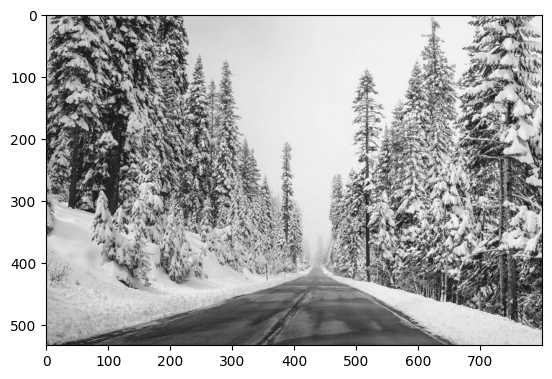

In [21]:
image2 = cv2.imread("sample_data\\image2.jpg")
plt.imshow(image2)
print(image2.shape)

In [22]:
gradient_x, gradient_y, gradient_mag, gradient_direction = compute_gradient(image2)

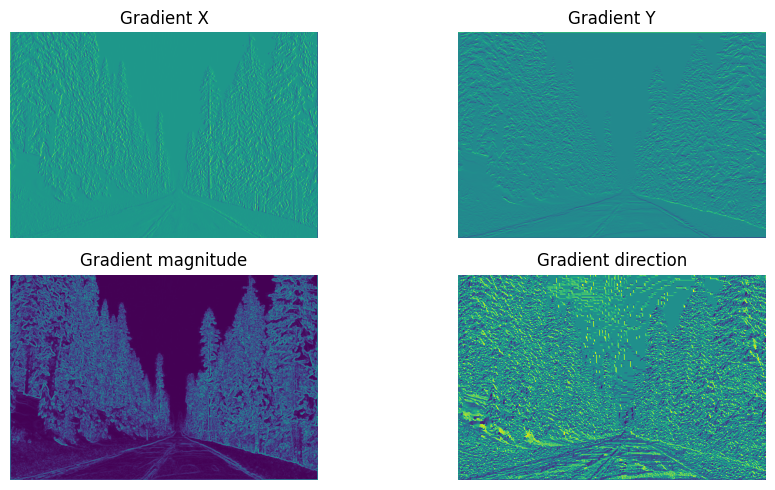

In [40]:

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(gradient_x)
plt.title("Gradient X")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_y)
plt.title("Gradient Y")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_mag)
plt.title("Gradient magnitude")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gradient_direction)
plt.title("Gradient direction")
plt.axis('off')

plt.tight_layout()
plt.show()


**ANSWER**

The **gradient** in the X-direction measures the change in intensity along the horizontal axis. A high positive gradient value in this direction suggests a transition from a dark region on the left to a brighter region on the right. Conversely, a high negative gradient value would imply the opposite: a transition from a bright region on the left to a darker region on the right.
The gradient in the Y-direction gauges the intensity change vertically. A positive gradient value here indicates a transition from a dark region at the top to a brighter one at the bottom, and vice versa for a negative value.

The **gradient magnitude**, combines both gradients in X and Y direction into a single positive value that represents if the pixel is located on an area with high contrast (an edge), low values mean there is no contrast, high values mean there is contrast or an edge 

The **gradient direction** provides the orientation of the contrast. Specifically, it gives the angle at which the intensity changes the most for a given pixel. This is especially useful in understanding the overall structure and orientation of features in the image

### 4.3.2 Second-order derivative filters *(10 pts)*

Compared to the Sobel filter, a Laplacian of Gaussian (LoG) relies on the second derivative of a Gaussian filter. Hence, it will focus on large gradients in the image. A LoG can be computed by the following three methods:



*   method 1: Smoothing the image with a Gaussian kernel (kernel size of 5 and standard deviation of 0.5), then taking the Laplacian of the smoothed image (i.e. second derivative).
*   method 2: Convolving the image directly with a LoG kernel (kernel size of 5 and standard deviation of 0.5).

*   method 3: Taking the Difference of two Gaussians (DoG) computed at different scales $\sigma_1$ and $\sigma_2$.





#### <span style="color:#F64E25;"> Exercise 8 </span>

Implement `compute_LoG`

The function should be able to apply any of the above mentioned methods depending on the value passed to the parameter *LOG_type*

**Note:**
You are not allowed to use the Python built-in functions for computing LOG kernels. But for doing 2D convolution, you can benefit from *scipy.signal.convolve2d* function.

In [29]:
# YOUR HELPER FUNCTIONS (IF NEEDED)
def LoG_kernel(sigma, kernel_size):
    # Initialize the kernel to zero
    kernel = np.zeros((kernel_size, kernel_size))

    # Calculate the center of the kernel
    center = kernel_size // 2

    # Loop through each cell of the kernel
    for i in range(kernel_size):
        for j in range(kernel_size):
            # Get the spatial coordinates relative to the center
            x = i - center
            y = j - center

            # Compute the Gaussian value
            gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))

            # Compute the Laplacian of the Gaussian value
            log_val = (-1 / (np.pi * sigma**4)) * (1 - (x**2 + y**2) / (2 * sigma**2)) * gaussian

            # Store the computed value in the kernel
            kernel[i, j] = log_val

    return kernel

In [36]:
def compute_LoG(image, LOG_type):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    kernel_size = 5
    sigma = 0.5
    sigma2 = 1

    if LOG_type == 1:
        # Method 1
        gaussian_kernel = gauss2D(sigma, sigma, kernel_size)
        print(gaussian_kernel.shape)
        print(image.shape)

        laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        
        # smoothing image
        smoothed_image = scipy.signal.convolve2d(image, gaussian_kernel, mode='same', boundary='symm')

        # applying second derivative (laplacian) to smoothed image
        imOut = scipy.signal.convolve2d(smoothed_image, laplacian_kernel, mode='same', boundary='symm')


    elif LOG_type == 2:
        # Method 2
        LoG_ker = LoG_kernel(sigma, kernel_size)
        imOut = scipy.signal.convolve2d(image, LoG_ker, mode='same', boundary='symm')


    elif LOG_type == 3:
        # Method 3
        # generate kernels
        gaussian_kernel_1 = gauss2D(sigma, sigma, kernel_size)
        gaussian_kernel_2 = gauss2D(sigma2, sigma2, kernel_size)

        # convolute the image sepparatelly
        img_conv_1 = scipy.signal.convolve2d(image, gaussian_kernel_1, mode='same', boundary='symm')
        img_conv_2 = scipy.signal.convolve2d(image, gaussian_kernel_2, mode='same', boundary='symm')

        # calculate the difference
        imOut = img_conv_1 - img_conv_2

    return imOut

#### <span style="color:orange;">  Questions 18 (10 pts) </span>

1.   Test your function using image2.jpg and visualize your results using the three methods (1 pts).





(5, 5)
(533, 800)


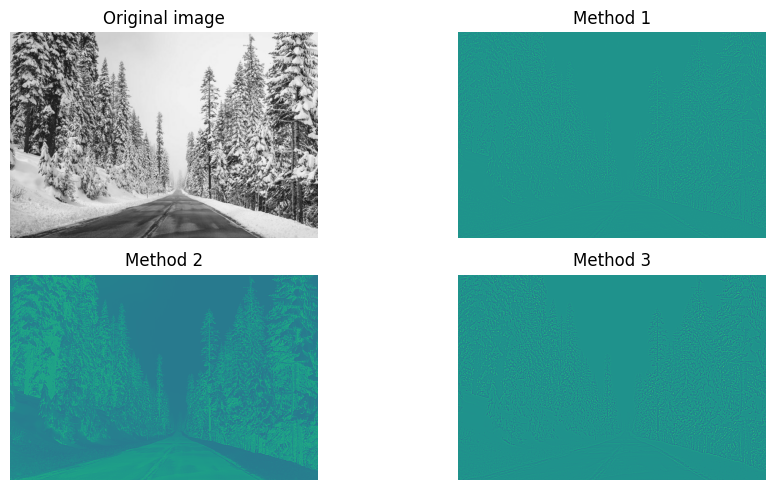

In [42]:
# TODO: YOUR CODE HERE
method_1 = compute_LoG(image2, 1)
method_2 = compute_LoG(image2, 2)
method_3 = compute_LoG(image2, 3)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image2)
plt.title("Original image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(method_1)
plt.title("Method 1")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(method_2)
plt.title("Method 2")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(method_3)
plt.title("Method 3")
plt.axis('off')

plt.tight_layout()
plt.show()


*Write your answer here*


2.   Discuss the difference between applying the three methods (3 pts).


**Method 1: This method involves two convolution steps: first with a Gaussian kernel to achieve smoothing, and then with a Laplacian kernel to detect edges. Since convolution is a linear operation, the order matters, and the result of this method is an image that's been smoothed to reduce noise before edges are detected.**

**Method 2: Directly convolves the image with an LoG kernel. This combines smoothing and edge detection in one step, which can be more efficient. It offers similar edge detection capability as Method 1 but reduces computational cost by performing only one convolution.**

**Method 3 : This method is an approximation of the LoG. By taking the difference between two Gaussian blurred images (with different standard deviations), edges are highlighted. This method is computationally more efficient, especially for larger kernel sizes or sigma values.**


3.   In the first method, why is it important to convolve an image with a Gaussian before convolving with a Laplacian? (2 pts)



**The primary reason is noise reduction. Images often contain noise, and edges can be detected more reliably in a smoothed image than in a noisy one. The Gaussian filter serves to smooth the image, reducing the effect of noise on the subsequent Laplacian edge detection. Without this step, the Laplacian would highlight noise as edges, leading to many false detections.**

4.   In the third method, what is the best ratio between $\sigma_1$ and $\sigma_2$ to achieve the best approximation of the LoG? What is the purpose of having 2 standard deviations? (2 pts)



**The best ratio typically used is**
\begin{equation}
\sigma_2 = \sqrt 2 \times \sigma_1
\end{equation}
​
**This provides a good approximation of the LoG while being computationally efficient.**
**The purpose of having two standard deviations is to generate two Gaussian blurred images that highlight features at different scales. By subtracting them, the resulting image approximates the LoG, highlighting edges.**

5.   What else is needed to improve the performance and isolate the road,  i.e. what else should be done? You don't have to provide any specific parameter or specific algorithm. Try to propose a direction which would be interesting to explore and how you would approach it. (2 pt)


**Direction: Exploring segmentation techniques can be fruitful. Roads often have certain distinctive features, such as being more uniform than their surroundings or having particular colors or textures**

**This could be done by preprocessing the image for enphasising uniform areas or a specific color related to roads. Then the methods above could be used again, now with better accuracy.**

## 4.4 Foreground-background separation *(25 pts)*

Foreground-background separation is an important task in the field of computer vision (see Figure). In this exercise, you will implement a simple unsupervised algorithm that leverages the variations in texture to segment the foreground object from the background. We will assume the foreground object has a distinct combination of textures compared to background. As mentioned earlier, Gabor filters are well-suited for texture analysis thanks to their frequency domain characteristics. Therefore, we will use a collection of Gabor filters with varying scale and orientations which we call a *filter bank*. The outline of the algorithm is as follows:

![](https://drive.google.com/uc?export=view&id=1w60xJ4UlG60Ie6ljRkHn0GJDdVu9eb5e)

**(Left)** Input image, **(Middle)** Foreground mask, **(Right)** Masked object. Foreground-Background separation aims at masking out the salient object pixels from the background pixels.

---

**Algorithm 1** Foreground-Background Segmentation Algorithm

---

**Input:** $x$ - input image

**Output:** $y$ - pixelwise labels



1.   Convert to grayscale if necessary.

>**if** $x$ is RGB **then**

>>$x$ $\leftarrow$ rgb2gray($x$)

>**end if**

2.   Create Gabor filterbank, $\mathcal{F}_{gabor}$, with varying $\sigma$, $\lambda$ and $\theta$.

3.   Filter $x$ with the filterbank. Store each output in $fmaps$.

4.   Compute the magnitude of the complex $fmaps$. Store the results in $fmags$.

>$fmags$ $\leftarrow$  $\vert fmaps \vert$

5.   Smooth $fmags$.

>$fmags$ $\leftarrow$  smooth($fmags$)

6.   Convert $fmags$ into data matrix, $f$.

>$f$ $\leftarrow$  reshape($fmags$)

7.   Cluster $f$ using kmeans into two sets.

>$y$ $\leftarrow$  kmeans($f$, 2)

---


### <span style="color:orange;"> Questions 19 (25 pts) </span>

1.   Run the algorithm on all test images with the provided parameter settings. What do you observe? Explain shortly. (15 pts)


*Write your answer here*


2.   Experiment with different $\lambda$, $\sigma$ and $\theta$ settings until you get reasonable outputs. Report what parameter settings work better for each input image and try to explain why. (4 pts)

**Hint:**
Don't change multiple variables at once. You might not need to change some at all.



*Write your answer here*

3.   After you achieve good separation on all test images, run the script again with corresponding parameters but this time with
`smoothingFlag = False`. (6 pts)

Describe what you observe at the output when smoothing is not applied on the magnitude images. Explain why it happens and try to reason about the motivation behind this step.

*Write your answer here*

### <span style="color:#F64E25;"> Exercise 9</span>

Please get yourself familiar with provided skeleton code below. Keep in mind that you will need your implementation of the **createGabor** function.

When you succesfully implement it all, it should run without problems and produce a reasonable segmentation with the default parameters on **kobi.png**.

#### Utility functions

In [ ]:
### Helper functions for the last exercise

def load_image(image_id: str='Polar'):
    '''
    Loads an image, resizes image with proper resize factor and sets proper color representation
    :param image_id: id of an image: Kobi, Polar, Robin-1, Robin-2, Cows, SciencePark
    :return: image
    '''
    if image_id == 'Kobi':
        img = cv2.imread('./sample_data/kobi.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.25
    elif image_id == 'Polar':
        img = cv2.imread('./sample_data/polar-bear-hiding.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.75
    elif image_id == 'Robin-1':
        img = cv2.imread('./sample_data/robin-1.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 1
    elif image_id == 'Robin-2':
        img = cv2.imread('./sample_data/robin-2.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.5
    elif image_id == 'Cows':
        img = cv2.imread('./sample_data/cows.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.5
    elif image_id == 'SciencePark':
        img = cv2.imread('./sample_data/sciencepark.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        resize_factor = 0.2
    else:
        raise ValueError('Image not available.')
        img = cv2.resize(img, (0, 0), fx=resize_factor, fy=resize_factor)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img


def show_image(image, image_id:str= "Polar", cmap='gray'):
    '''
    Displays image in grey scale
    :param image: image that should be displayed
    :param image_id: id of an image: Kobi, Polar, Robin-1, Robin-2, Cows, SciencePark
    :param cmap: matplotlib cmap arg
    '''
    plt.figure()
    plt.title(image_id)
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

In [ ]:
### Foreground-Background segmentation algoritm
### Part 0 - read image and convert to grayscale

image_id = "Kobi"
img = load_image(image_id) # load an image with the Polar bear
show_image(img, f'Input image: {image_id}')

# TODO: YOUR CODE HERE
# convert to gray-scale if necessary

In [ ]:
### Foreground-Background segmentation algoritm
### Part 1 - create Gabor filterbank

def filterBank(img):

  # Design array of Gabor Filters
  # In this code section, you will create a Gabor Filterbank. A filterbank is
  # a collection of filters with varying properties (e.g. {shape, texture}).
  # A Gabor filterbank consists of Gabor filters of distinct orientations
  # and scales. We will use this bank to extract texture information from the
  # input image.

  numRows, numCols = img.shape

  # Estimate the minimum and maximum of the wavelengths for the sinusoidal
  # carriers.
  # ** This step is pretty much standard, therefore, you don't have to
  #    worry about it. It is cycles in pixels. **
  lambdaMin = 4/np.sqrt(2)
  lambdaMax = np.sqrt(abs(numRows)**2 + abs(numCols)**2)

  # Specify the carrier wavelengths.
  # (or the central frequency of the carrier signal, which is 1/lambda)
  n = np.floor(np.log2(lambdaMax/lambdaMin))
  lambdas = 2**np.arange(0, (n-2)+1) * lambdaMin

  # Define the set of orientations for the Gaussian envelope.
  dTheta       = 2 * np.pi/8                  # \\ the step size
  orientations = np.arange(0, np.pi+dTheta, dTheta)

  # Define the set of sigmas for the Gaussian envelope. Sigma here defines
  # the standard deviation, or the spread of the Gaussian.
  sigmas = np.array([1,2])

  # Now you can create the filterbank. We provide you with a Python list
  # called gaborFilterBank in which we will hold the filters and their
  # corresponding parameters such as sigma, lambda and etc.
  # ** All you need to do is to implement createGabor(). Rest will be handled
  #    by the provided code block. **
  gaborFilterBank = []
  tic = time.time()
  for lmbda in lambdas:
    for sigma in sigmas:
      for theta in orientations:
            # Filter parameter configuration for this filter.
            psi    = 0
            gamma  = 0.5

            # Create a Gabor filter with the specs above,
            # using the function createGabor()
            # and store result in gaborFilterBank

            filter_config = {}
            filter_config["filterPairs"] = createGabor( sigma, theta, lmbda, psi, gamma )
            filter_config["sigma"]       = sigma
            filter_config["lmbda"]       = lmbda
            filter_config["theta"]       = theta
            filter_config["psi"]         = psi
            filter_config["gamma"]       = gamma
            gaborFilterBank.append(filter_config)

  ctime = time.time() - tic

  print('--------------------------------------\n \t\tDetails\n--------------------------------------')
  print(f'Total number of filters       : {len(gaborFilterBank)}')
  print(f'Number of scales (sigma)      : {len(sigmas)}')
  print(f'Number of orientations (theta): {len(orientations)}')
  print(f'Number of carriers (lambda)   : {len(lambdas)}')
  print(f'---------------------------------------')
  print(f'Filter bank created in {ctime} seconds.')
  print(f'---------------------------------------')
  return(gaborFilterBank)

# test
gaborFilterBank = filterBank(img)

In [ ]:
### Foreground-Background segmentation algoritm
### Part 2 - gabor features fMaps and fMags

def gaborFeatures(img, gaborFilterBank, visFlag=False):

  '''
  Filter images using Gabor filter bank using quadrature pairs (real and imaginary parts)
  You will now filter the input image with each complex Gabor filter in
  gaborFilterBank structure and store the output in the cell called featureMaps.
  Hint-1: Apply both the real imaginary parts of each kernel
          separately in the spatial domain (i.e. over the image).
  Hint-2: Assign each output (i.e. real and imaginary parts) in
          variables called real_out and imag_out.
  Hint-3: Use built-in cv2 function, filter2D, to convolve the filter
          with the input image. Check the options for padding. Find
          the one that works well. You might want to
          explain what works better and why shortly in the report.
  '''

  featureMaps = []

  for gaborFilter in gaborFilterBank:
    # gaborFilter["filterPairs"] has two elements. One is related to the real part
    # of the Gabor Filter and the other one is the imagineray part.

    real_out = None  # \\TODO: filter the grayscale input with real part of the Gabor
    imag_out = None  # \\TODO: filter the grayscale input with imaginary part of the Gabor

    featureMaps.append(np.stack((real_out, imag_out), 2))

    # Visualize the filter responses if you wish.
    if visFlag:
        fig = plt.figure()

        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(real_out)    # Real
        title = "Re[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilter["lmbda"],
                                                                                                 gaborFilter["theta"],
                                                                                                 gaborFilter["sigma"])
        ax.set_title(title)
        ax.axis("off")

        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(imag_out)    # Real
        title = "Im[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilter["lmbda"],
                                                                                                 gaborFilter["theta"],
                                                                                                 gaborFilter["sigma"])
        ax.set_title(title)
        ax.axis("off")
        plt.show()

  # Compute the magnitude
  # Now, you will compute the magnitude of the output responses.
  # \\ Hint: (real_part^2 + imaginary_part^2)^(1/2) \\
  featureMags = []
  for i, fm in enumerate(featureMaps):
    real_part = fm[...,0]
    imag_part = fm[...,1]
    mag = None  # \\TODO: Compute the magnitude here
    featureMags.append(mag)

    # Visualize the magnitude response if you wish.
    if visFlag:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(mag.astype(np.uint8))    # visualize magnitude
        title = "Re[h(x,y)], \n lambda = {0:.4f}, \n theta = {1:.4f}, \n sigma = {2:.4f}".format(gaborFilterBank[i]["lmbda"],
                                                                                                 gaborFilterBank[i]["theta"],
                                                                                                 gaborFilterBank[i]["sigma"])
        ax.set_title(title)
        ax.axis("off")

  print('Created', len(featureMags), 'features for each pixel')
  return featureMags

# test
featureMags = gaborFeatures(img, gaborFilterBank)

In [ ]:
### Foreground-Background segmentation algoritm
### Part 3 - cluster features in two sets

def clusterFeatures(img, featureMags, smoothingFlag=True):

  '''
  Prepare and Preprocess features
  You can think of each filter response as a sort of feature representation
  for the pixels. Now that you have numFilters = |gaborFilterBank| filters,
  we can represent each pixel by this many features.
  Question: What kind of features do you think gabor filters might correspond to?

  You will now implement a smoothing operation over the magnitude images in
  featureMags.
  Hint-1: For each i in [1, length(featureMags)], smooth featureMags{i} using an appropriate first order Gaussian kernel.
  Hint-2: cv2 filter2D function is helpful here.
  '''

  numRows, numCols = img.shape
  features = np.zeros(shape=(numRows, numCols, len(featureMags)))

  if smoothingFlag:
    # \\TODO:
    # FOR_LOOP
        # i)  filter the magnitude response with appropriate Gaussian kernels
        # ii) insert the smoothed image into features[:,:,j]
    # END_FOR
  else:
    # Don't smooth but just insert magnitude images into the matrix called features.
    for i, fmag in enumerate(featureMags):
        features[:,:,i] = fmag
        if i//5==0:
          print(i)

  '''
  Reshape the filter outputs (i.e. tensor called features) of size
  [numRows, numCols, numFilters] into a matrix of size [numRows*numCols, numFilters]
  This will constitute our data matrix which represents each pixel in the
  input image with numFilters features.
  '''

  features = np.reshape(features, newshape=(numRows * numCols, -1))

  '''
  Standardize features.
  Hint: see https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
  '''

  # features = None  # \\ TODO: i)  Implement standardization on matrix called features.
                     #          ii) Return the standardized data matrix.

  '''
  (Optional) Visualize the saliency map using the first principal component
  of the features matrix. It will be useful to diagnose possible problems
  with the pipeline and filterbank.
  '''

  transformed_feature = PCA(n_components=1).fit_transform(features) # select the first component
  transformed_feature = np.ascontiguousarray(transformed_feature, dtype=np.float32)
  feature2DImage = np.reshape(transformed_feature,newshape=(numRows,numCols))
  plt.figure()
  plt.title(f'Pixel representation projected onto first PC')
  plt.imshow(feature2DImage, cmap='gray')
  plt.axis("off")
  plt.show()

  '''
  Apply k-means algorithm to cluster pixels using the data matrix features.
  Hint-1: search about sklearn kmeans function https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.
  Hint-2: when calling sklearn's kmeans function, use the parameter n_clusters as defined in the aloritm description above.
  '''

  tic = time.time()
  pixLabels = None  # \\TODO: Return cluster labels per pixel

  ctime = time.time() - tic
  print(f'Clustering completed in {ctime} seconds.')

  return pixLabels

# run
pixLabels = clusterFeatures(img, featureMags)

In [ ]:
### Foreground-Background segmentation algoritm
### Part 4 - Visualise result

# Visualize the clustering by reshaping pixLabels into original grayscale
# input size [numRows numCols].
numRows, numCols = img.shape
pixLabels = np.reshape(pixLabels, newshape=(numRows, numCols))
plt.figure()
plt.title(f'Pixel clusters')
plt.imshow(pixLabels)
plt.axis("off")
plt.show()

# Use the pixLabels to visualize segmentation.
Aseg1 = np.zeros_like(img)
Aseg2 = np.zeros_like(img)
BW = pixLabels == 1  # check for the value of your labels in pixLabels (could be 1 or 0 instead of 2)
# BW = np.repeat(BW[:, :, np.newaxis], 3, axis=2) # do this only if you have 3 channels in the img
Aseg1[BW] = img[BW]
Aseg2[~BW] = img[~BW]

plt.figure()
plt.title(f'montage')
plt.imshow(Aseg1, 'gray', interpolation='none')
plt.imshow(Aseg2, 'jet',  interpolation='none', alpha=0.7)
plt.axis("off")
plt.show()

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

Name:

Contribution on research: \\
Contribution on programming: \\
Contribution on writing: \\

# -End of Notebook-